Verifying Installation:

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
import tensorflow as tf

print("All good!")


All good!


Loading Data & Basic Exploration:

In [50]:
## Loading the Dataset

import pandas as pd
df = pd.read_csv("creditcard.csv")
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [51]:
## Checking Shape of Data

df.shape


(284807, 31)

In [52]:
## Basic Info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [53]:
## Summary Statistics

df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [54]:
## Fraud vs Normal Count (Class Imbalance)

df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [55]:
## Showing percentage

df['Class'].value_counts(normalize=True) * 100

Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64

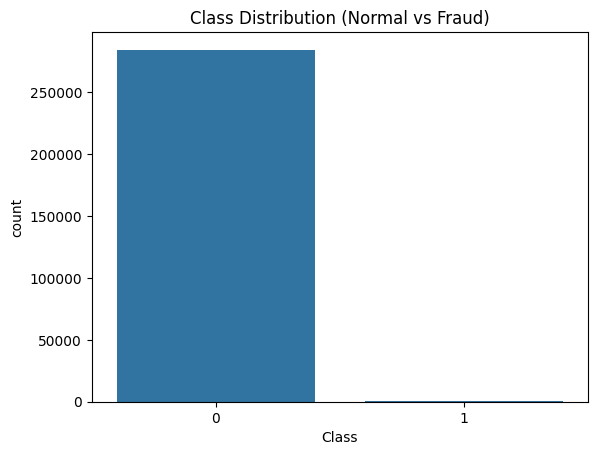

In [87]:
## Visualizing Class Imbalance

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='Class')
plt.title("Class Distribution (Normal vs Fraud)")
plt.show()

In [57]:
## Checking Missing Values

df.isnull().sum()


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [58]:
## Displaying Fraud vs Normal Transactions Separately

fraud = df[df['Class'] == 1]
normal = df[df['Class'] == 0]

print("Fraud cases:", len(fraud))
print("Normal cases:", len(normal))


Fraud cases: 492
Normal cases: 284315


Data Preprocessing (Clean & Prepare Data):

In [59]:
## Importing StandardScaler

from sklearn.preprocessing import StandardScaler


In [60]:
## Initializing Scaler

scaler = StandardScaler()


In [61]:
## Scaling Amount column

df['scaled_amount'] = scaler.fit_transform(df[['Amount']])


In [62]:
## Scaling Time column

df['scaled_time'] = scaler.fit_transform(df[['Time']])


In [63]:
## Droping Original Columns (Time, Amount)
## We keep only scaled versions.

df.drop(['Time', 'Amount'], axis=1, inplace=True)


In [64]:
## Moving Scaled Columns to the Front (Optional but Professional)

scaled_features = ['scaled_time', 'scaled_amount']
other_features = [col for col in df.columns if col not in scaled_features + ['Class']]
df = df[scaled_features + other_features + ['Class']]
df.head()


,scaled_time,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.996583,0.244964,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-1.996583,-0.342475,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,-1.996562,1.160686,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,-1.996562,0.140534,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-1.996541,-0.073403,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [65]:
## Preparing X and y

X = df.drop('Class', axis=1)
y = df['Class']


ISOLATION FOREST:

In [66]:
## Importing Isolation Forest

from sklearn.ensemble import IsolationForest


In [67]:
## Initializing the Model

iso_model = IsolationForest(
    n_estimators=200,          # Number of trees
    contamination=0.0017,      # Approximate fraud ratio (0.17%)
    random_state=42,
    verbose=0
)


In [68]:
## Fit the Model

iso_model.fit(X)


IsolationForest(contamination=0.0017, n_estimators=200, random_state=42)

In [69]:
## Predicting Anomalies

preds = iso_model.predict(X)

# Isolation Forest outputs:
# -1 = anomaly (fraud)
#  1 = normal

df['iso_pred'] = preds
df['iso_pred'] = df['iso_pred'].map({1:0, -1:1})  # Convert to 0 = normal, 1 = fraud


In [70]:
## Evaluate Model

from sklearn.metrics import confusion_matrix, classification_report

print("Confusion Matrix:")
print(confusion_matrix(y, df['iso_pred']))

print("\nClassification Report:")
print(classification_report(y, df['iso_pred']))


Confusion Matrix:
[[283958    357]
 [   364    128]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.26      0.26      0.26       492

    accuracy                           1.00    284807
   macro avg       0.63      0.63      0.63    284807
weighted avg       1.00      1.00      1.00    284807



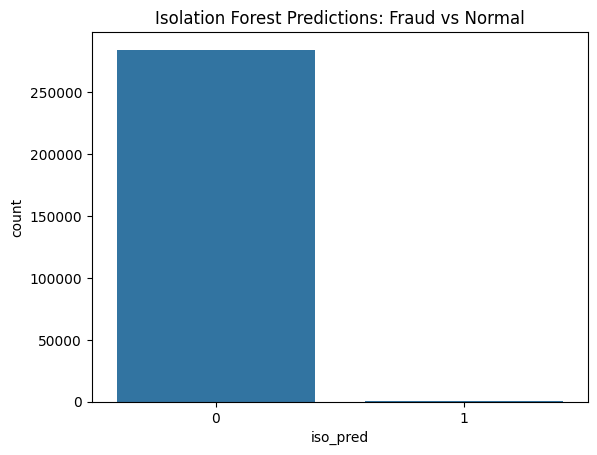

In [71]:
## Optional Visualization: Fraud Detection

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=df['iso_pred'])
plt.title("Isolation Forest Predictions: Fraud vs Normal")
plt.show()


AUTOENCODER:

In [72]:
## Importing TensorFlow/Keras

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam


In [73]:
## Separating Normal and Fraud Data
## We train Autoencoder only on normal transactions.

# Separate transactions
normal = df[df['Class'] == 0]
fraud = df[df['Class'] == 1]

# Drop target column
X_normal = normal.drop(['Class', 'iso_pred'], axis=1)
X_fraud = fraud.drop(['Class', 'iso_pred'], axis=1)


In [74]:
## Defining Autoencoder Architecture

input_dim = X_normal.shape[1]  # Number of features (30)

# Input Layer
input_layer = Input(shape=(input_dim,))

# Encoder
encoded = Dense(14, activation='relu')(input_layer)
encoded = Dense(7, activation='relu')(encoded)
bottleneck = Dense(3, activation='relu')(encoded)

# Decoder
decoded = Dense(7, activation='relu')(bottleneck)
decoded = Dense(14, activation='relu')(decoded)
output_layer = Dense(input_dim, activation='linear')(decoded)

# Autoencoder Model
autoencoder = Model(inputs=input_layer, outputs=output_layer)
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

autoencoder.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 30)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 14)             │           434 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 7)              │           105 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 3)              │            24 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 7)              │            28 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 14)             │           112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 30)             │           450 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,153 (4.50 KB)

 Trainable params: 1,153 (4.50 KB)

 Non-trainable params: 0 (0.00 B)

In [75]:
## Training Autoencoder

history = autoencoder.fit(
    X_normal, X_normal,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    shuffle=True
)


Epoch 1/20
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 0.7497 - val_loss: 0.5861
Epoch 2/20
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - loss: 0.5468 - val_loss: 0.5213
Epoch 3/20
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - loss: 0.4972 - val_loss: 0.4811
Epoch 4/20
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - loss: 0.4777 - val_loss: 0.4734
Epoch 5/20
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - loss: 0.4652 - val_loss: 0.4657
Epoch 6/20
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - loss: 0.4580 - val_loss: 0.4691
Epoch 7/20
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 0.4514 - val_loss: 0.4612
Epoch 8/20
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - loss: 0.4496 - val_loss: 0.4913
Epoch 9/20
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - loss: 0.4444 - val_loss: 0.4568
Epoch 10/20
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 0.4384 - val_loss: 0.4803
Epoch 11/20
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 0.4413 - val_loss: 0.4580
Epoch 12/20
7108/71

In [76]:
## Calculating Reconstruction Error

import numpy as np

# Predict on normal and fraud
recon_normal = autoencoder.predict(X_normal)
recon_fraud = autoencoder.predict(X_fraud)

# Mean Squared Error
mse_normal = np.mean(np.power(X_normal - recon_normal, 2), axis=1)
mse_fraud = np.mean(np.power(X_fraud - recon_fraud, 2), axis=1)


8885/8885 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [77]:
## Choosing Threshold
## Threshold = mean + 3*std of normal MSE

threshold = np.mean(mse_normal) + 3*np.std(mse_normal)
print("Threshold for fraud detection:", threshold)


Threshold for fraud detection: 2.7458921179837024


In [78]:
## Predicting Fraud

# Normal predictions
normal['AE_pred'] = mse_normal > threshold
# Fraud predictions
fraud['AE_pred'] = mse_fraud > threshold

# Combine back for evaluation
df_ae = pd.concat([normal, fraud])


C:\Users\hp\AppData\Local\Temp\ipykernel_13092\278793578.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  normal['AE_pred'] = mse_normal > threshold
C:\Users\hp\AppData\Local\Temp\ipykernel_13092\278793578.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud['AE_pred'] = mse_fraud > threshold


In [79]:
## Evaluating Autoencoder

from sklearn.metrics import confusion_matrix, classification_report

y_true = df_ae['Class']
y_pred = df_ae['AE_pred'].astype(int)

print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))

print("\nClassification Report:")
print(classification_report(y_true, y_pred))


Confusion Matrix:
[[283028   1287]
 [    91    401]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.24      0.82      0.37       492

    accuracy                           1.00    284807
   macro avg       0.62      0.91      0.68    284807
weighted avg       1.00      1.00      1.00    284807



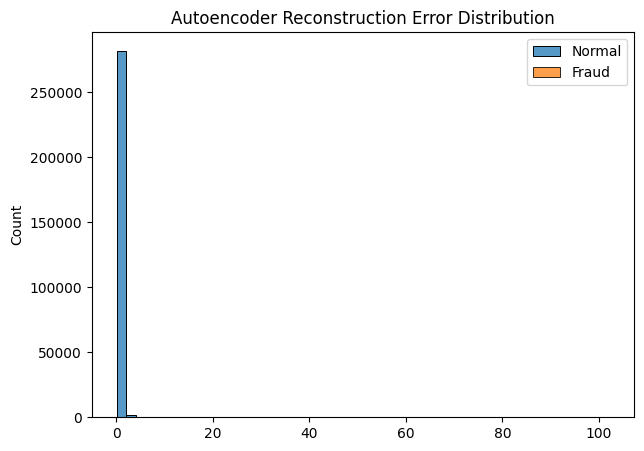

In [80]:
## Visualizing Reconstruction Error

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7,5))
sns.histplot(mse_normal, label='Normal', bins=50)
sns.histplot(mse_fraud, label='Fraud', bins=50)
plt.legend()
plt.title("Autoencoder Reconstruction Error Distribution")
plt.show()


PCA Visualization:

In [81]:
## Import PCA

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


In [82]:
## Apply PCA

# Use all features except Class and predictions
features = df.drop(['Class', 'iso_pred'], axis=1)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(features)

print("PCA Result Shape:", pca_result.shape)


PCA Result Shape: (284807, 2)


In [83]:
## Create a DataFrame with PCA results

pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['Class'] = df['Class'].values


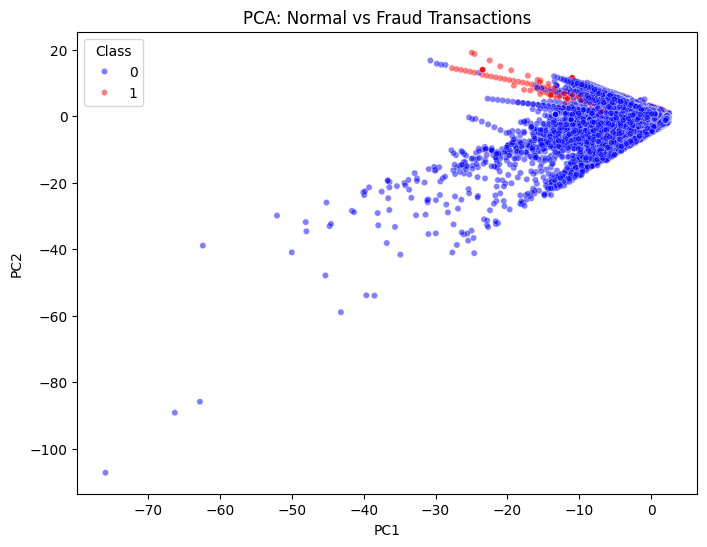

In [84]:
## Plot Normal vs Fraud

plt.figure(figsize=(8,6))
sns.scatterplot(
    x='PC1', y='PC2',
    hue='Class',
    palette={0:'blue', 1:'red'},
    data=pca_df,
    alpha=0.5,
    s=20
)
plt.title("PCA: Normal vs Fraud Transactions")
plt.show()


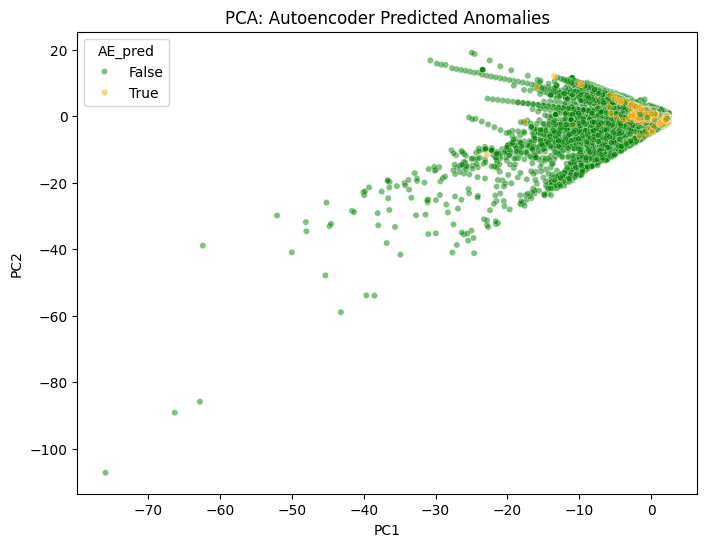

In [85]:
## Optional: Highlight Autoencoder Predictions

pca_df['AE_pred'] = df_ae['AE_pred'].values

plt.figure(figsize=(8,6))
sns.scatterplot(
    x='PC1', y='PC2',
    hue='AE_pred',
    palette={0:'green', 1:'orange'},
    data=pca_df,
    alpha=0.5,
    s=20
)
plt.title("PCA: Autoencoder Predicted Anomalies")
plt.show()
